# 標準誤差

標準誤差はある母集団の統計量の代替として、標本データから得られた推定値がどのぐらい真の値に近いかを示します。

通常「標本データから得られた平均値」について、その平均値が真の平均値に対してどのぐらいバラつきがあるかを示し、バラつきが小さいほど「信頼できる」と評価できます。

誤差の概念図を下に示します。（標準偏差は、母集団から得られる母標準偏差と、標本から得られる標本標準偏差があることに注意）

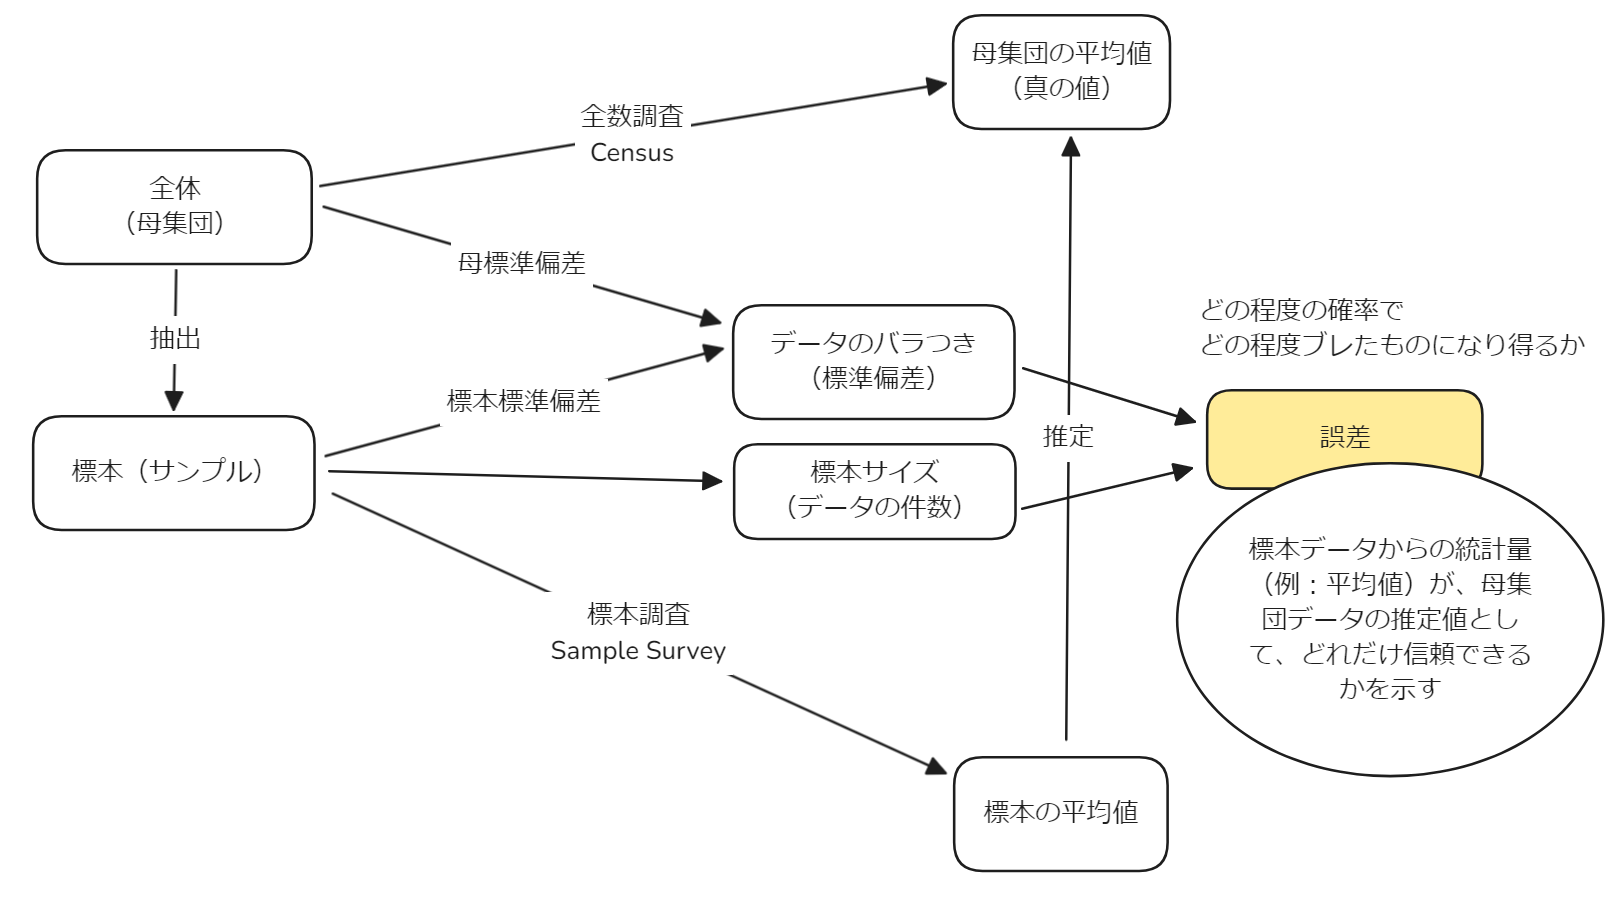

誤差は標本サイズと標準偏差（母標準偏差が無い時は標本標準偏差を使う）の関数として表され、下のような式で求めます。

- 母標準偏差を使う場合： $\frac{\sigma}{\sqrt{n}}$
- 標本標準偏差を使う場合： $\frac s{\sqrt{n}}$

いずれの場合も「標準偏差」を「標本サイズ $n$」の平方根で割ります。これはつまり「誤差」は「標本サイズの平方根に反比例する」ことを表します。つまり

- 標本サイズが大きいほど、誤差が小さくなる
- 標本サイズが小さいほど、誤差が大きくなる

これは、例えば「５人の男性の身長の平均値をもって、男子全員の平均値とするには無理がある、なぜならたまたまその５人が背が低い（もしくは高い）人ばかりだった可能性があるから」という直感に近いでしょう。

以下は標準誤差と標準偏差、そして標準偏差の入力になる分散との関係を示す概念図です。

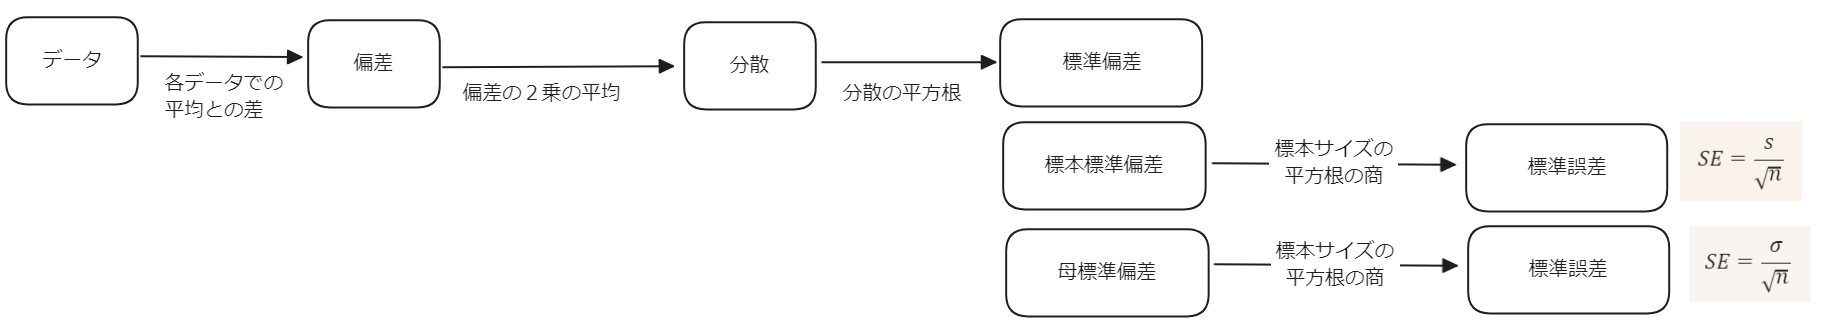

以下は標本サイズが増えれば増えるほど、標準誤差（ここでは母標準偏差を使う場合の標準誤差）が小さくなる様子を示すアニメーションです。

<img src="img/standard_error1.gif" alt="Description of GIF" style="width:800px;"/>

#### アニメーションのコード
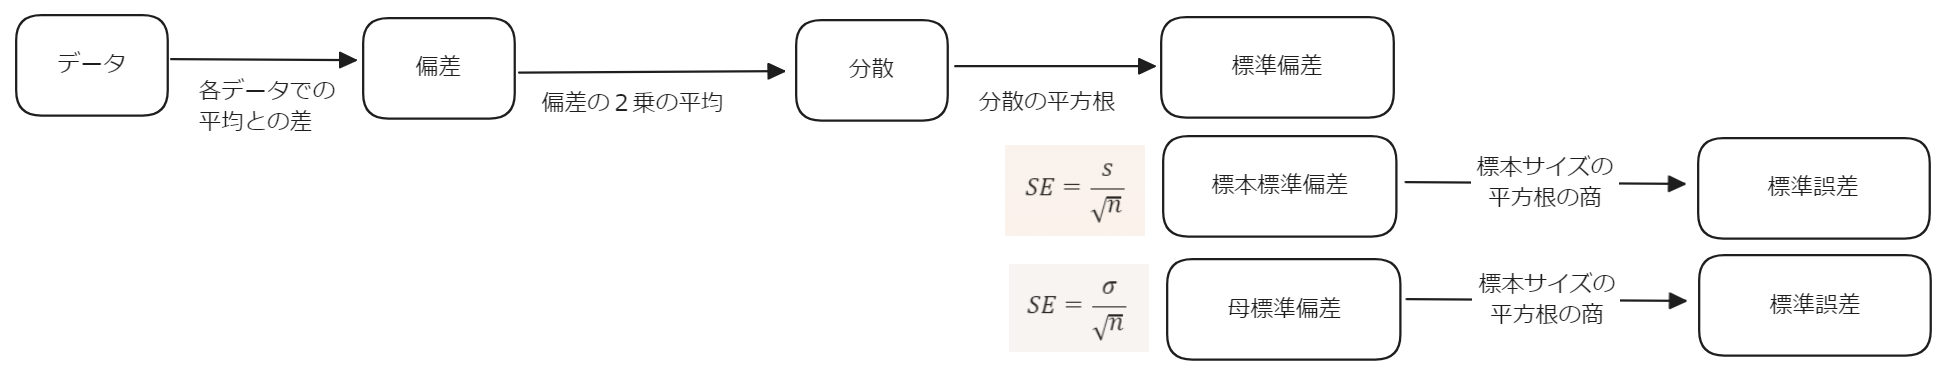

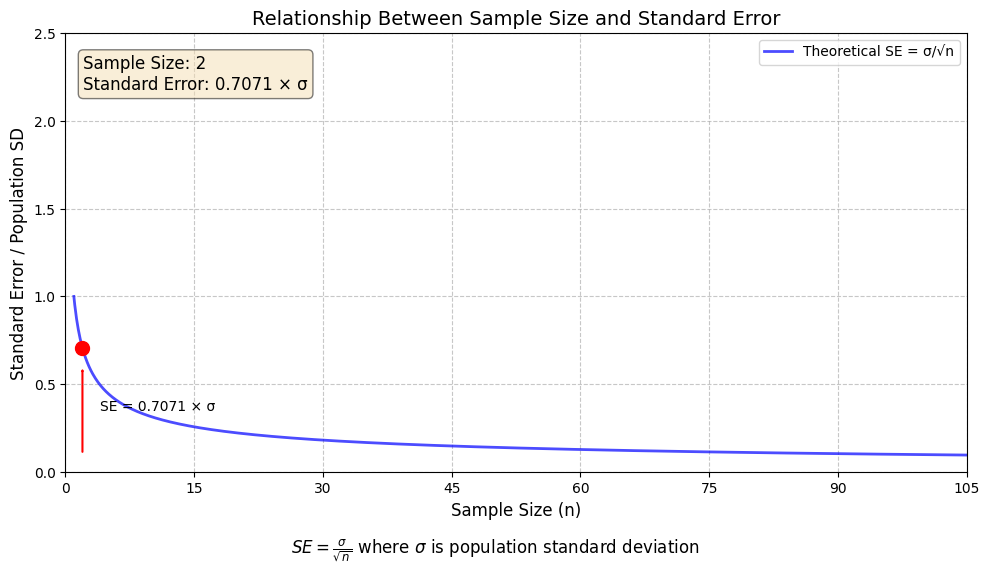

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import MaxNLocator

# 設定パラメータ
np.random.seed(42)  # 再現性のため
population_mean = 50
population_std = 10
max_sample_size = 100
y_min, y_max = 0, 2.5  # Yの範囲（標準誤差/標準偏差の比率）

# 理論的な標準誤差の計算関数
def theoretical_standard_error(sample_size, population_std):
    return population_std / np.sqrt(sample_size)

# アニメーションのフレーム数
n_frames = 120
sample_sizes = np.linspace(2, max_sample_size, n_frames).astype(int)

# 図の初期化
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.15)

# x軸とy軸の範囲を設定
ax.set_xlim(0, max_sample_size + 5)
ax.set_ylim(y_min, y_max)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# 軸ラベルとタイトル
ax.set_xlabel('Sample Size (n)', fontsize=12)
ax.set_ylabel('Standard Error / Population SD', fontsize=12)
ax.set_title('Relationship Between Sample Size and Standard Error', fontsize=14)

# 理論曲線の計算（SE = σ/√n）
x_curve = np.linspace(1, max_sample_size + 5, 1000)
y_curve = 1 / np.sqrt(x_curve)  # 標準化された標準誤差（SE/σ）

# 理論曲線のプロット
curve_line, = ax.plot(x_curve, y_curve, 'b-', lw=2, alpha=0.7, label='Theoretical SE = σ/√n')

# 移動する赤い点の初期化
red_point, = ax.plot([], [], 'ro', ms=10)

# テキストボックスの初期化
info_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# グリッド線の追加
ax.grid(True, linestyle='--', alpha=0.7)

# 注釈用の矢印
arrow = FancyArrowPatch((0, 0), (0, 0), color='red', arrowstyle='->', lw=1.5)
ax.add_patch(arrow)
arrow_text = ax.text(0, 0, '', fontsize=10)

# レジェンド
ax.legend(loc='upper right')

# アニメーション更新関数
def update(frame):
    sample_size = sample_sizes[frame]
    
    # 標準化された標準誤差（SE/σ）
    standard_error_ratio = 1 / np.sqrt(sample_size)
    
    # 赤い点の位置を更新
    red_point.set_data([sample_size], [standard_error_ratio])
    
    # 情報テキストを更新
    info_text.set_text(f'Sample Size: {sample_size}\nStandard Error: {standard_error_ratio:.4f} × σ')
    
    # 矢印の位置を更新
    arrow_start = (sample_size, y_min + 0.1)
    arrow_end = (sample_size, standard_error_ratio - 0.1)
    arrow.set_positions(arrow_start, arrow_end)
    
    # 矢印テキストの位置を更新
    arrow_text.set_position((sample_size + 2, (arrow_start[1] + arrow_end[1]) / 2))
    arrow_text.set_text(f'SE = {standard_error_ratio:.4f} × σ')
    
    return red_point, info_text, arrow, arrow_text

# アニメーションを作成
ani = animation.FuncAnimation(fig, update, frames=n_frames, 
                              interval=100, blit=True)

# 数式による説明を追加
formula_text = r'$SE = \frac{\sigma}{\sqrt{n}}$ where $\sigma$ is population standard deviation'
plt.figtext(0.5, 0.02, formula_text, ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# アニメーションをGIFとして保存する場合
ani.save('standard_error1.gif', writer='pillow', fps=10)

# 標準誤差と標準偏差の関係

標準誤差は標準偏差を分子に取る分数の形を取るので、分子が大きければ結果も大きい。つまりデータのバラつきが大きいほど誤差も大きくなる、という直感に従うと言えます。

$$
SE = \frac{標準偏差}{\sqrt{n}}
$$

例えば、全く同じサンプルサイズで集計した平均値が全く同じだとしても、元のデータの標準偏差次第では、その平均値がどのぐらい母集団の真の平均値を代表できているかの信頼性が変わってきます。

以下はそれを表す概念図です。（標本サイズと、算出された平均値が全く同じことに注意）

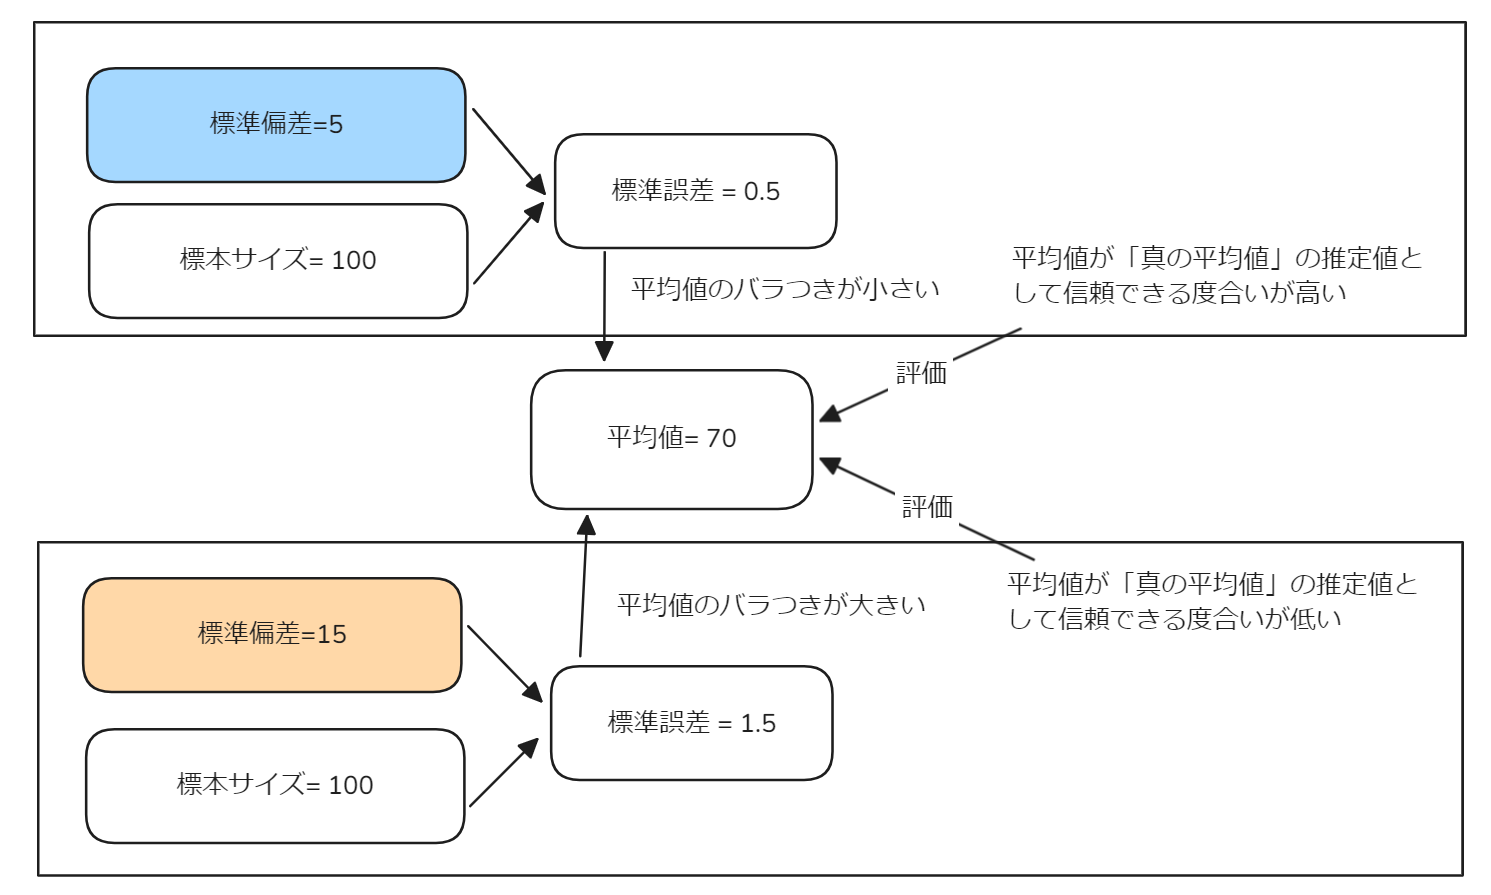

このことから「同じ平均値だとしても、そしてさらに同じサンプルサイズだとしても、元のデータの標準偏差次第でその信頼性が異なる」ことが分かります。

以下は、上の例をさらにに広げて、平均値は固定して、異なるサンプルサイズごとの二つのグループ間（ひとつは標準偏差が小さく、もうひとつは標準偏差が大きい）での標準誤差の違いを表しています。

どちらもサンプルサイズを増やせば増やすほど標準誤差は小さくなりますが、元のデータの標準偏差が影響している様子が分かります。

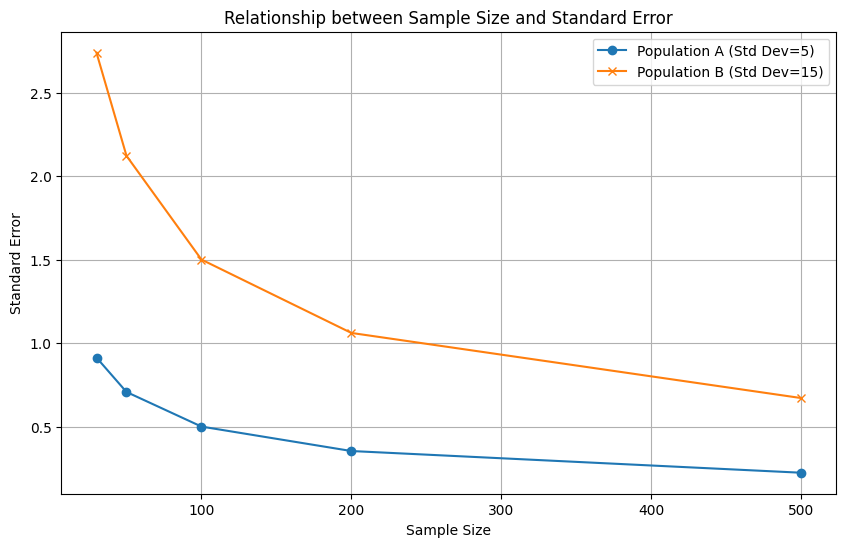

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Population parameters
mean = 70  # Population mean (common)
std_A = 5  # Standard deviation of population A
std_B = 15 # Standard deviation of population B

# Sample sizes
sample_sizes = np.array([30, 50, 100, 200, 500])

# Calculate and plot standard errors
se_A = std_A / np.sqrt(sample_sizes)
se_B = std_B / np.sqrt(sample_sizes)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, se_A, marker='o', linestyle='-', label='Population A (Std Dev=5)')
plt.plot(sample_sizes, se_B, marker='x', linestyle='-', label='Population B (Std Dev=15)')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')
plt.title('Relationship between Sample Size and Standard Error')
plt.grid(True)
plt.legend()
plt.show()


別の視点で「平均が同じでも標準偏差が異なる様子」を示すのに、下のグラフのように「ヒゲ」を使うことができます。

95% Confidence Interval for Population A: (np.float64(68.61407070887437), np.float64(71.38592929112563))
95% Confidence Interval for Population B: (np.float64(65.8422121266231), np.float64(74.1577878733769))


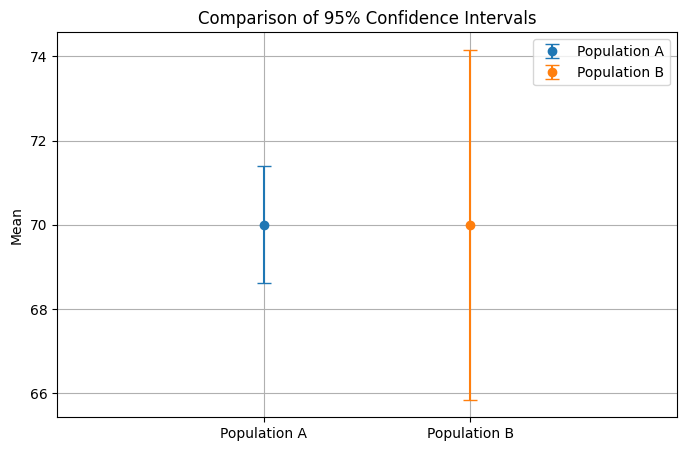

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Population parameters
mean = 70  # Population mean (common)
std_A = 5  # Standard deviation of population A
std_B = 15 # Standard deviation of population B

# Sample size
sample_size = 50

# Calculate standard errors
se_A = std_A / np.sqrt(sample_size)
se_B = std_B / np.sqrt(sample_size)

# Confidence intervals (95%)
confidence_interval_A = (mean - 1.96 * se_A, mean + 1.96 * se_A)  # meanを使用
confidence_interval_B = (mean - 1.96 * se_B, mean + 1.96 * se_B)  # meanを使用

print(f"95% Confidence Interval for Population A: {confidence_interval_A}")
print(f"95% Confidence Interval for Population B: {confidence_interval_B}")

# Plot confidence intervals
plt.figure(figsize=(8, 5))
plt.errorbar(1, mean, yerr=1.96 * se_A, fmt='o', label='Population A', capsize=5)  # meanを使用
plt.errorbar(2, mean, yerr=1.96 * se_B, fmt='o', label='Population B', capsize=5)  # meanを使用
plt.xlim(0, 3)
plt.ylabel('Mean')
plt.xticks([1, 2], ['Population A', 'Population B'])
plt.title('Comparison of 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

## 平均値の標準誤差と割合の標準誤差

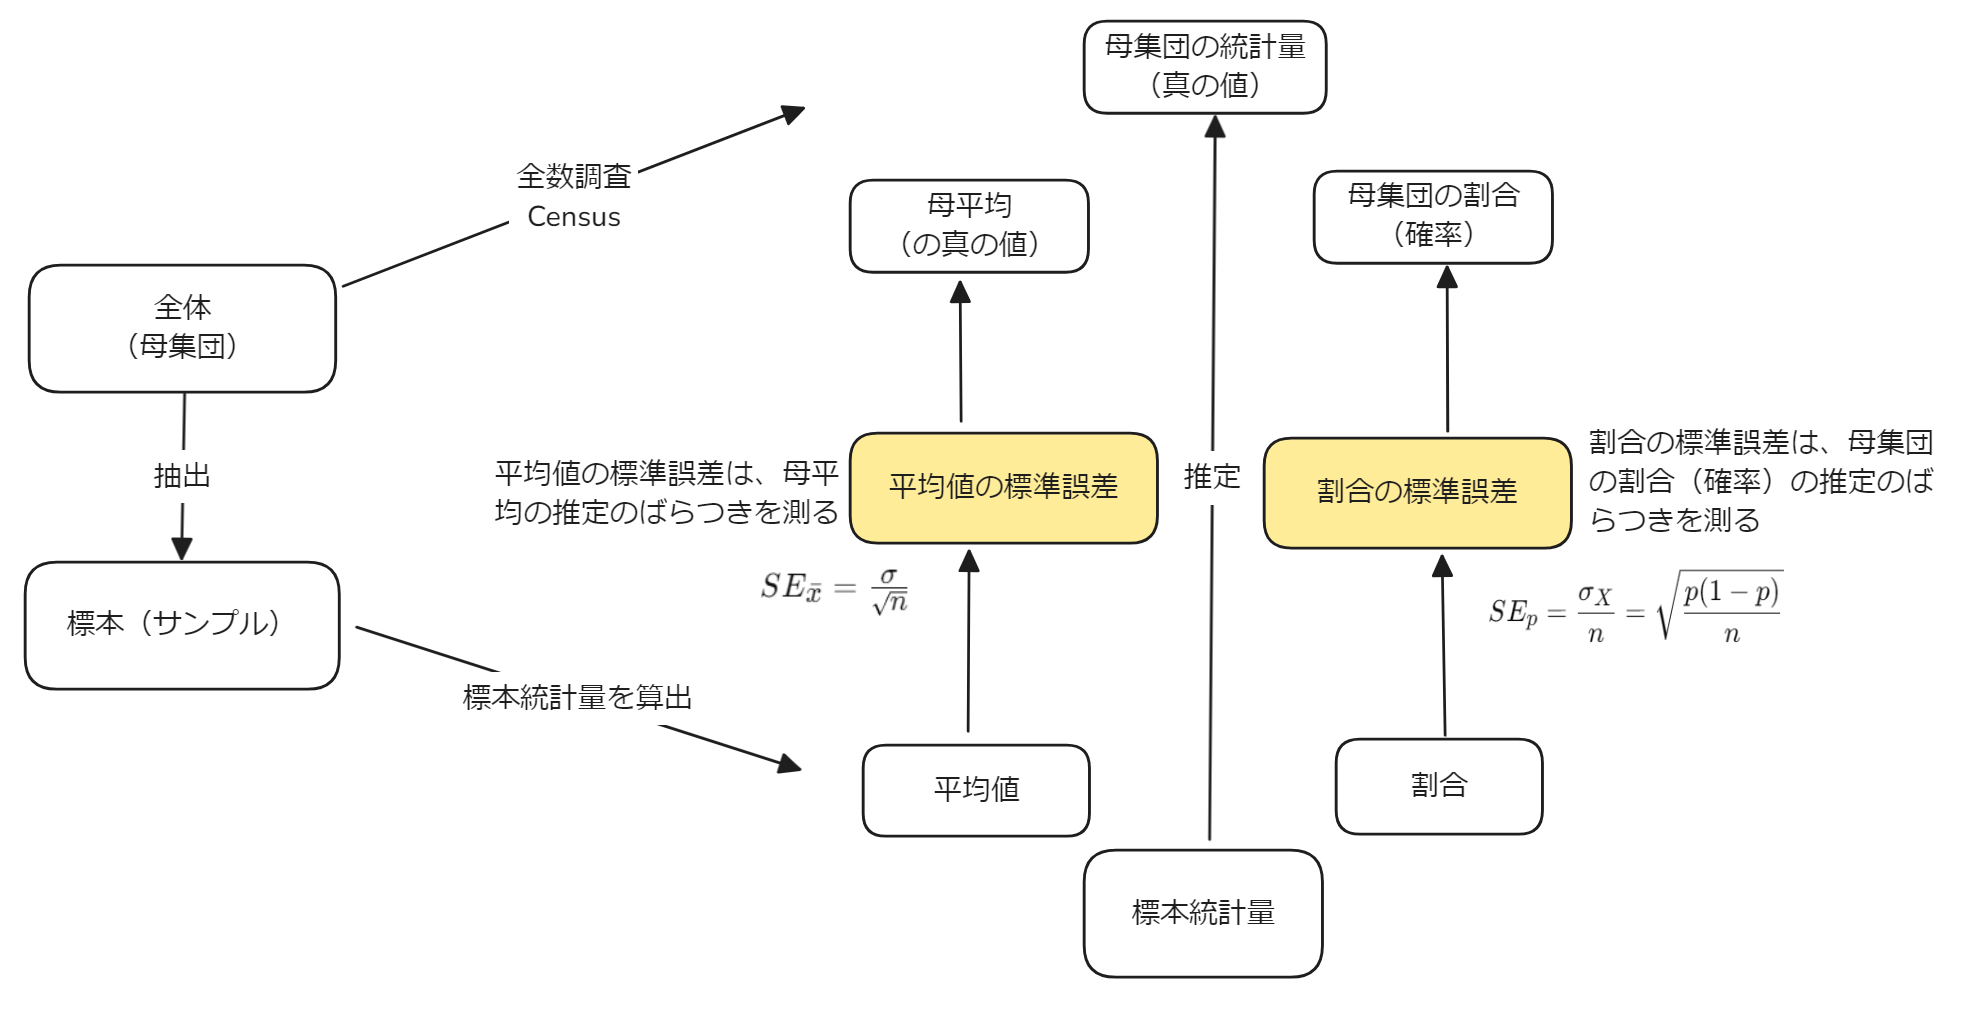